In [1]:
import arrow
import datetime
import gsw
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import pandas as pd
import xarray as xr
import cmocean.cm as cm
import matplotlib.dates as mpl_dates


In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

In [3]:
iY = 258; iX = 178; iZ = 28
depths = slice(0, iZ)
iY2 = 388; iX2 = 271
print (mesh.variables['gdepw_0'][0, iZ+1, iY2, iX2])
e3t = mesh.variables['e3t_0'][0, 0:iZ, iY, iX]
print(e3t.shape)

<xarray.Variable ()>
[1 values with dtype=float32]
(28,)


In [4]:
def get_ts(start, endtime, numberofdays):
    timerange = arrow.Arrow.range('day', start, endtime)
    saltV = np.empty((numberofdays, iZ))
    tempV = np.empty_like(saltV)
    saltS = np.empty_like(saltV)
    tempS = np.empty_like(saltV)
    time = []
    for it, r in enumerate(timerange):
        dir1 = r.format('DDMMMYY').lower()
        ymd = r.format('YYYYMMDD')
        filename = f'SalishSea_1d_{ymd}_{ymd}_grid_T.nc'
        with xr.open_dataset(os.path.join('/results2/SalishSea/nowcast-green.202111/', dir1, filename)) as ds:
            saltV[it, :] = ds.vosaline[0, depths, iY, iX]
            saltS[it, :] = ds.vosaline[0, depths, iY2, iX2]
            tempV[it, :] = ds.votemper[0, depths, iY, iX]
            tempS[it, :] = ds.votemper[0, depths, iY2, iX2]
            time.append(r.datetime)
    return time, saltV, saltS, tempV, tempS

In [5]:
def find_mean_sigma(saltV, saltS, tempV, tempS):
    sigmaV = gsw.density.sigma0(saltV, tempV)

    tlen = sigmaV.shape[0]
    south = np.mean(sigmaV[0:tlen] * np.expand_dims(e3t,axis=0), axis=1)

    sigmaS = gsw.density.sigma0(saltS, tempS)
    tlen = sigmaS.shape[0]
    north = np.mean(sigmaS[0:tlen] * np.expand_dims(e3t,axis=0), axis=1)
    return south, north

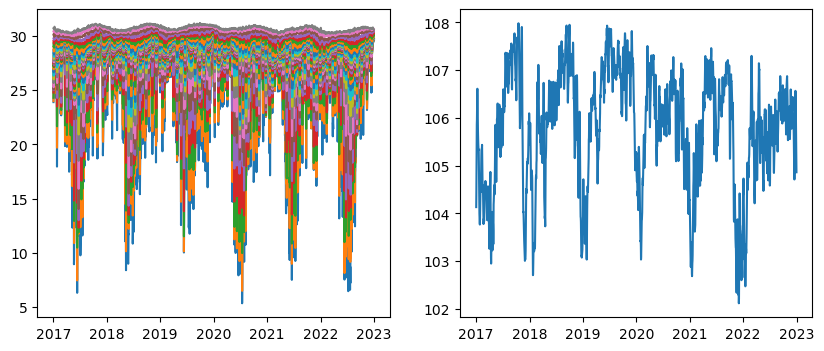

In [7]:
#Density difference for vicsill to pointrob

start = datetime.datetime(2017, 1, 1)
endtime = datetime.datetime(2022, 12, 31)
numberofdays = int((endtime - start)/(datetime.datetime(2015, 1, 2) - datetime.datetime(2015, 1, 1)) + 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
time, saltV, saltS, tempV, tempS = get_ts(start, endtime, numberofdays)
ax[0].plot(time, saltS); # Plots 1 line for each depth at north section
south, north = find_mean_sigma(saltV, saltS, tempV, tempS) #Average of all depths for south and north
ax[1].plot(time, south)

density = pd.DataFrame(data={'south': south, 'north': north}, index=time)
density.to_csv('sigma_2017-22_202111_mean.csv')

### Density difference to each strait

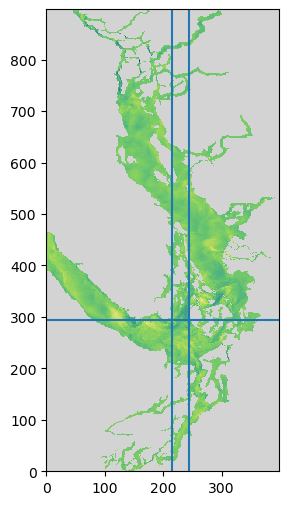

In [7]:
vvel = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/10dec17/SalishSea_1h_20171210_20171210_grid_V.nc').vomecrty
vmask = 1 - mesh.vmask[0]

cmap = cm.haline
cmap.set_bad('lightgrey')

fig,ax = plt.subplots(figsize=(3,6))
vfull = np.ma.masked_array(vvel[1,0],mask = vmask[0])
colours = ax.pcolormesh(vfull, cmap=cmap)
plt.axhline(y=295)
plt.axvline(x=215)
plt.axvline(x=245)

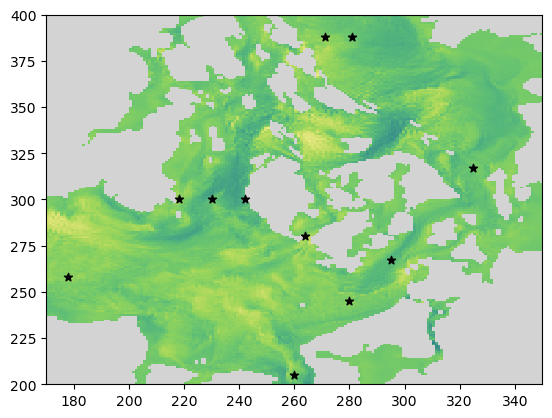

In [12]:
fig,ax = plt.subplots()
vfull = np.ma.masked_array(vvel[1,0],mask = vmask[0])
colours = ax.pcolormesh(vfull, cmap=cmap)
ax.set_ylim([200,400])
ax.set_xlim([170,350])
# plt.axhline(y=277,color='k')
# plt.axvline(x=264,color='k')
# plt.axvline(x=266,color='k')
ax.scatter(178,258,marker='*',color='k') #VS
ax.scatter(230,300,marker='*',color='k') #Haro
ax.scatter(242,300,marker='*',color='k') #Haro east
ax.scatter(218,300,marker='*',color='k') #Haro west
ax.scatter(295,267,marker='*',color='k') #Rosario
ax.scatter(325,317,marker='*',color='k') #Rosario north
ax.scatter(280,245,marker='*',color='k') #Rosario south
ax.scatter(264,280,marker='*',color='k') #San Juan
ax.scatter(271,388,marker='*',color='k') #PR
ax.scatter(281,388,marker='*',color='k') #PR middle
ax.scatter(260,205,marker='*',color='k') #Admiralty

Density difference for Haro: iX = 230, iY = 310

Density difference for Harov2: iX = 238

Density difference for Rosario: iX = 290, iY = 260

Density difference for SanJuan: iX = 264, iY = 280

Density difference for admiralty: iX = 260, iY = 205, iZ = 24

In [39]:
print(vvel[0,29,310,238].values) # Haro
print(vvel[0,30,388,271].values) # Point Roberts
print(vvel[0,26,258,178].values) # VicSill
print(vvel[0,25,260,290].values) # Haro
print(vvel[0,24,205,260].values) # Haro

0.21259036660194397
-0.06850405782461166
-0.14176695048809052
-0.3190953731536865
0.024149322882294655


<xarray.Variable ()>
[1 values with dtype=float32]
(28,)


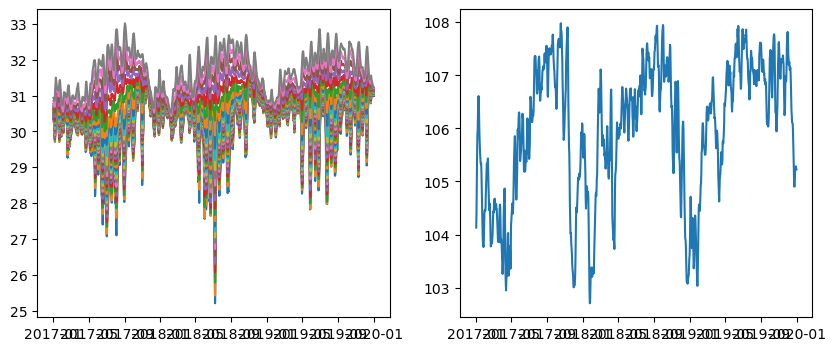

In [31]:
# Density difference for Haro 

iY = 258; iX = 178; iZ = 28
depths = slice(0, iZ)
iY2 = 300; iX2 = 230
print (mesh.variables['gdepw_0'][0, iZ+1, iY2, iX2])
e3t = mesh.variables['e3t_0'][0, 0:iZ, iY, iX]
print(e3t.shape)

start = datetime.datetime(2017, 1, 1)
endtime = datetime.datetime(2019, 12, 31)
numberofdays = int((endtime - start)/(datetime.datetime(2015, 1, 2) - datetime.datetime(2015, 1, 1)) + 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
time, saltV, saltS, tempV, tempS = get_ts(start, endtime, numberofdays)
ax[0].plot(time, saltS); # Plots 1 line for each depth at north section
south, north = find_mean_sigma(saltV, saltS, tempV, tempS) #Average of all depths for south and north
ax[1].plot(time, south)

density = pd.DataFrame(data={'south': south, 'north': north}, index=time)
# density.to_csv('sigma_2018_harovs_202111_mean_v2.csv')

In [28]:
# #Initialize empty 
# x_idx = 242 - 218
# iX_haror = np.arange(218,243,1)

# iY = 258; iZ = 28
# depths = slice(0, iZ)
# iY2 = 300; iX2 = 230
# start = datetime.datetime(2017, 1, 1)
# endtime = datetime.datetime(2019, 12, 31)
# numberofdays = int((endtime - start)/(datetime.datetime(2015, 1, 2) - datetime.datetime(2015, 1, 1)) + 1)
# count = 0 
# south_arr= np.empty((numberofdays,x_idx))
# north_arr= np.empty((numberofdays,x_idx))

# for i in iX_haror:
#     iX = i
#     e3t = mesh.variables['e3t_0'][0, 0:iZ, iY, i]
#     time, saltV, saltS, tempV, tempS = get_ts(start, endtime, numberofdays)
#     south, north = find_mean_sigma(saltV, saltS, tempV, tempS) #Average of all depths for south and north
#     south_arr[:,count] = south
#     north_arr[:,count] = north

In [27]:
# south_avg = np.mean(south_arr,axis=1)
# north_avg = np.mean(north_arr,axis=1)

# density = pd.DataFrame(data={'south': south_avg, 'north': north_avg}, index=time)
# density.to_csv('sigma_2018_haropr_avg.csv')

<xarray.Variable ()>
[1 values with dtype=float32]
(28,)


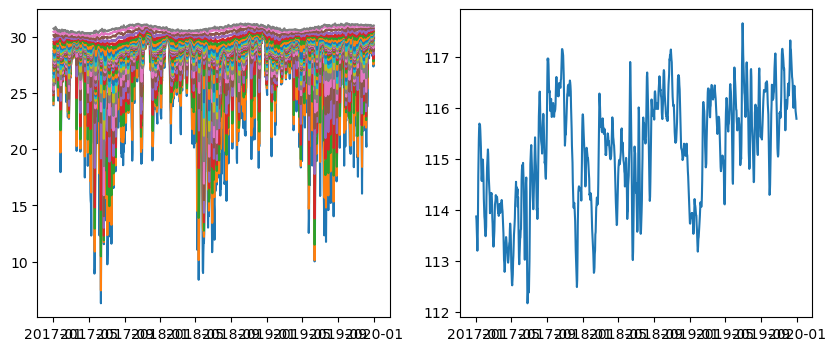

In [11]:
# Density difference for Haro - point roberts

iY = 300; iX = 238; iZ = 28
depths = slice(0, iZ)
iY2 = 388; iX2 = 271
print (mesh.variables['gdepw_0'][0, iZ+1, iY2, iX2])
e3t = mesh.variables['e3t_0'][0, 0:iZ, iY, iX]
print(e3t.shape)

start = datetime.datetime(2017, 1, 1)
endtime = datetime.datetime(2019, 12, 31)
numberofdays = int((endtime - start)/(datetime.datetime(2015, 1, 2) - datetime.datetime(2015, 1, 1)) + 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
time, saltV, saltS, tempV, tempS = get_ts(start, endtime, numberofdays)
ax[0].plot(time, saltS); # Plots 1 line for each depth at north section
south, north = find_mean_sigma(saltV, saltS, tempV, tempS) #Average of all depths for south and north
ax[1].plot(time, south)

density = pd.DataFrame(data={'south': south, 'north': north}, index=time)
density.to_csv('sigma_2018_haropr_202111_meanv2.csv')

<xarray.Variable ()>
[1 values with dtype=float32]
(28,)


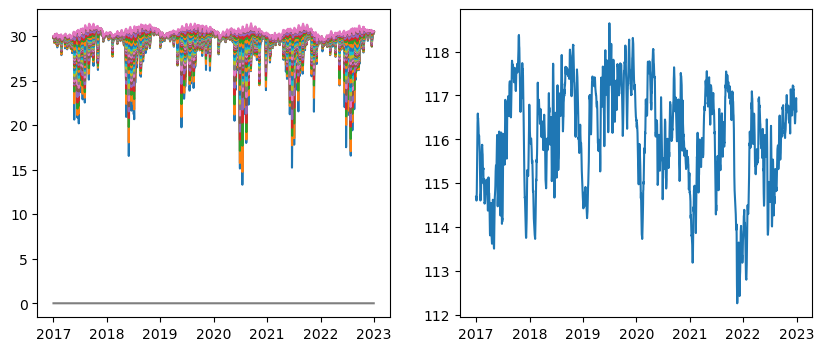

In [9]:
# Density difference for Rosario

iY = 280; iX = 245; iZ = 28
depths = slice(0, iZ)
iY2 = 317; iX2 = 325
print (mesh.variables['gdepw_0'][0, iZ+1, iY2, iX2])
e3t = mesh.variables['e3t_0'][0, 0:iZ, iY, iX]
print(e3t.shape)

start = datetime.datetime(2017, 1, 1)
endtime = datetime.datetime(2022, 12, 31)
numberofdays = int((endtime - start)/(datetime.datetime(2015, 1, 2) - datetime.datetime(2015, 1, 1)) + 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
time, saltV, saltS, tempV, tempS = get_ts(start, endtime, numberofdays)
ax[0].plot(time, saltS); # Plots 1 line for each depth at north section
south, north = find_mean_sigma(saltV, saltS, tempV, tempS) #Average of all depths for south and north
ax[1].plot(time, south)

density = pd.DataFrame(data={'south': south, 'north': north}, index=time)
density.to_csv('sigma_2017-22_rosarioNS.csv')

<xarray.Variable ()>
[1 values with dtype=float32]
(25,)


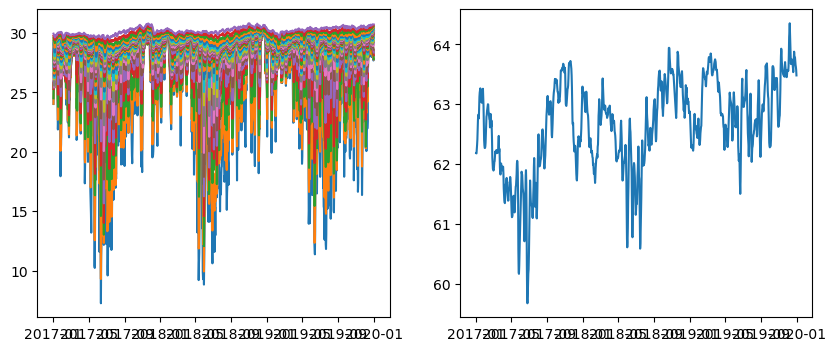

In [33]:
# Density difference for Rosario from point robers

iY = 260; iX = 290; iZ = 25
depths = slice(0, iZ)
iY2 = 388; iX2 = 281
print (mesh.variables['gdepw_0'][0, iZ+1, iY2, iX2])
e3t = mesh.variables['e3t_0'][0, 0:iZ, iY, iX]
print(e3t.shape)

start = datetime.datetime(2017, 1, 1)
endtime = datetime.datetime(2019, 12, 31)
numberofdays = int((endtime - start)/(datetime.datetime(2015, 1, 2) - datetime.datetime(2015, 1, 1)) + 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
time, saltV, saltS, tempV, tempS = get_ts(start, endtime, numberofdays)
ax[0].plot(time, saltS); # Plots 1 line for each depth at north section
south, north = find_mean_sigma(saltV, saltS, tempV, tempS) #Average of all depths for south and north
ax[1].plot(time, south)

density = pd.DataFrame(data={'south': south, 'north': north}, index=time)
density.to_csv('sigma_2018_rosariopr_202111_meanv2.csv')

<xarray.Variable ()>
[1 values with dtype=float32]
(28,)


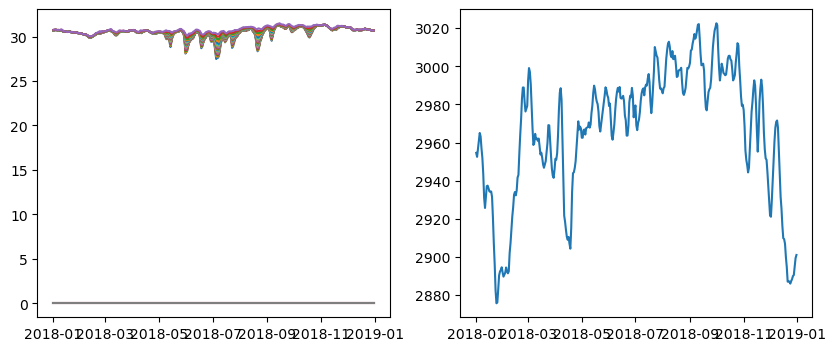

In [7]:
# Density difference for San Juan

iY = 258; iX = 178; iZ = 28
depths = slice(0, iZ)
iY2 = 280; iX2 = 264
print (mesh.variables['gdepw_0'][0, iZ+1, iY2, iX2])
e3t = mesh.variables['e3t_0'][0, 0:iZ, iY, iX]
print(e3t.shape)

start = datetime.datetime(2018, 1, 1)
endtime = datetime.datetime(2018, 12, 31)
numberofdays = int((endtime - start)/(datetime.datetime(2015, 1, 2) - datetime.datetime(2015, 1, 1)) + 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
time, saltV, saltS, tempV, tempS = get_ts(start, endtime, numberofdays)
ax[0].plot(time, saltS); # Plots 1 line for each depth at north section
south, north = find_mean_sigma(saltV, saltS, tempV, tempS) #Average of all depths for south and north
ax[1].plot(time, south)

density = pd.DataFrame(data={'south': south, 'north': north}, index=time)
density.to_csv('sigma_2018_sjcvs_202111.csv')

San Juan Correlation:  0.8821417542102815
Haro correlation:  0.8560807498866674
Rosario correlation:  0.8304983200072023


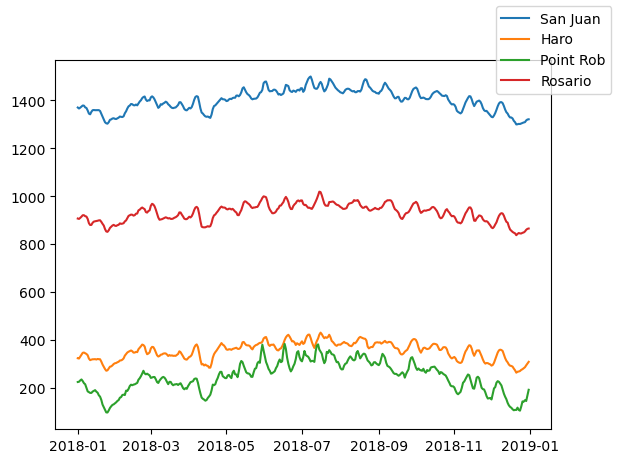

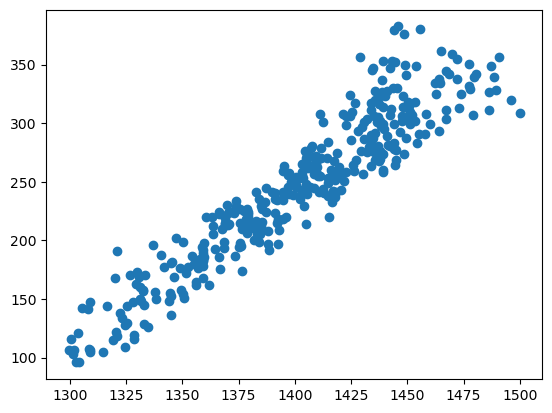

In [16]:
density_prvs = pd.read_csv('sigma_2018_202111.csv')
density_harovs = pd.read_csv('sigma_2018_harovs_202111.csv')
density_rosariovs = pd.read_csv('sigma_2018_rosariovs_202111.csv')


start_date = datetime.datetime(2018,1,1)
end_date = datetime.datetime(2018,12,31)
timestep = datetime.timedelta(days=1)
date = start_date
datelist_dens = []

while date <= end_date:
    datelist_dens.append(date)
    date+=timestep
    
fig,ax = plt.subplots()
ax.plot(datelist_dens,density.south - density.north,label='San Juan')
ax.plot(datelist_dens,density_harovs.iloc[:,1]-density_harovs.iloc[:,2],label='Haro')
ax.plot(datelist_dens,density_prvs.iloc[:,1]-density_prvs.iloc[:,2],label='Point Rob')
ax.plot(datelist_dens,density_rosariovs.iloc[:,1]-density_rosariovs.iloc[:,2],label='Rosario')
fig.legend()

fig,ax = plt.subplots()
plt.scatter(density.south - density.north,density_prvs.iloc[:,1]-density_prvs.iloc[:,2])

from scipy import stats

slope,intercept,r_value,p_value,std_err = stats.linregress(density.south - density.north,density_prvs.iloc[:,1]-density_prvs.iloc[:,2])
slope,intercept,r_value2,p_value,std_err = stats.linregress(density_harovs.iloc[:,1]-density_harovs.iloc[:,2],density_prvs.iloc[:,1]-density_prvs.iloc[:,2])
slope,intercept,r_value3,p_value,std_err = stats.linregress(density_rosariovs.iloc[:,1]-density_rosariovs.iloc[:,2],density_prvs.iloc[:,1]-density_prvs.iloc[:,2])
print('San Juan Correlation: ',r_value**2)
print('Haro correlation: ',r_value2**2)
print('Rosario correlation: ',r_value3**2)

High correlation between pr/vs, ros/vs and haro/vs. But haro/vs is slightly better correlated than ros/vs

<xarray.Variable ()>
[1 values with dtype=float32]
(28,)


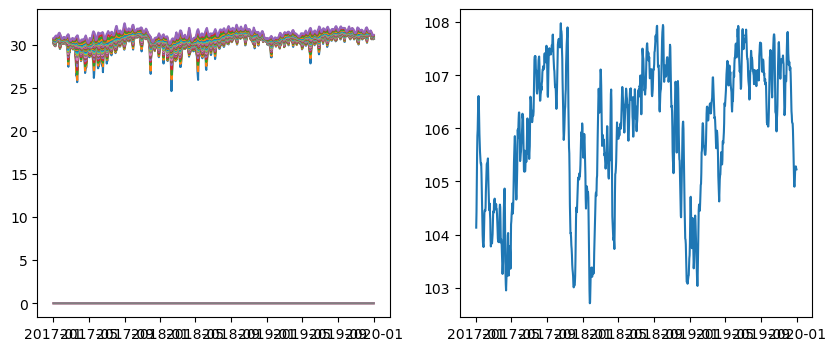

In [9]:
# Density difference for Admiralty

iY = 258; iX = 178; iZ = 28
depths = slice(0, iZ)
iY2 = 205; iX2 = 260
print (mesh.variables['gdepw_0'][0, iZ+1, iY2, iX2])
e3t = mesh.variables['e3t_0'][0, 0:iZ, iY, iX]
print(e3t.shape)

start = datetime.datetime(2017, 1, 1)
endtime = datetime.datetime(2019, 12, 31)
numberofdays = int((endtime - start)/(datetime.datetime(2015, 1, 2) - datetime.datetime(2015, 1, 1)) + 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
time, saltV, saltS, tempV, tempS = get_ts(start, endtime, numberofdays)
ax[0].plot(time, saltS); # Plots 1 line for each depth at north section
south, north = find_mean_sigma(saltV, saltS, tempV, tempS) #Average of all depths for south and north
ax[1].plot(time, south)

density = pd.DataFrame(data={'south': south, 'north': north}, index=time)
density.to_csv('sigma_2018_vsadm_202111_mean_v2.csv')